## How to construct and use the unityvr dataclass?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from unityvr.preproc import logproc as lp
from unityvr.viz import viz, utils

#### Generate data object

In [2]:
dirName = "/Users/hamida/Documents/Data/raw/Fly_0008"
fileName = "Log_2025-07-28_15-23-48_Fly_0008E.json"
fileName

'Log_2025-07-28_15-23-48_Fly_0008E.json'

In [3]:
uvrTest = lp.constructUnityVRexperiment(dirName,fileName)
uvrTest.printMetadata()

correcting for Unity angle convention.
Metadata:

expid  :  testExp
experiment  :  test experiment
genotype  :  testGenotype
sex  :  NA
flyid  :  NA
trial  :  trial008E
date  :  2025-07-28
time  :  15-23-48
ballRad  :  0.03999999910593033
translationalGain  :  1.0
setFrameRate  :  120
notes  :  NA
temperature  :  NA
angle_convention  :  right-handed


#### Use of object-functions

In [5]:
frameftDf = uvrTest.downsampleftDf()
frameftDf.head()

,frame,ficTracTReadMs,ficTracTWriteMs,wx_ft,wy_ft,wz_ft
0,1.0,11326.0,0.0,-0.008677,0.147724,0.315012
1,2.0,1618.0,0.0,0.034042,0.008783,0.043579
2,3.0,2280.0,0.0,-0.005671,0.002295,-0.072451
3,4.0,3060.0,0.0,0.012613,0.007181,0.026586
4,5.0,3274.0,0.0,0.022513,-0.005009,0.027423


#### Plot trajectory

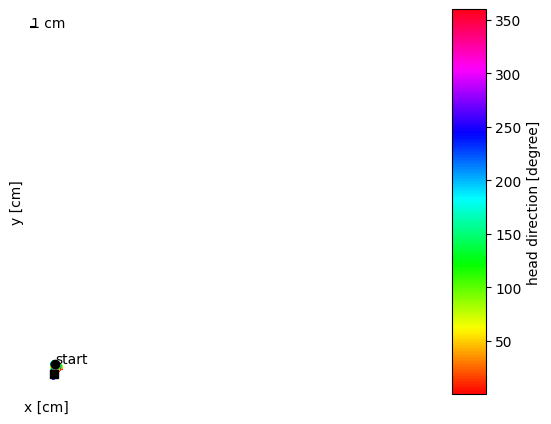

In [18]:
#conversion factor to cm
dc2cm = 10

fig, axs = viz.plotFlyPath(uvrTest, dc2cm, figsize=(10,5))
utils.pathPlotAxisTheme(axs[0],'cm')
utils.plotScaleBar(axs[0],1,(-7,1),'1 cm')

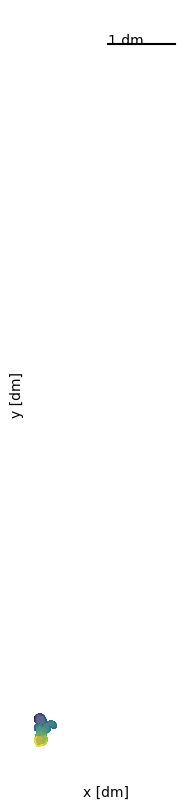

In [19]:
# Plot trajectory witth objects (all in decimeter)
fig, ax = viz.plotVRpathWithObjects(uvrTest,limx=[-np.inf, -np.inf],limy=[-np.inf, -np.inf], myfigsize=(10,10))
utils.pathPlotAxisTheme(ax,'dm')
utils.plotScaleBar(ax,1,(1,0),'1 dm')

#### Save object to file, load object from file

In [7]:
preprocDir = dirName #choose location for preprocessing (for simplicity here we use the sample directory)
savepath = uvrTest.saveData(preprocDir, uvrTest.metadata['trial'])
print(savepath)

../sample//trial01/uvr


In [8]:
uvrTest_loaded = lp.loadUVRData(savepath)
uvrTest_loaded.printMetadata()

Metadata:

expid  :  SS96-x-7f_panA2
experiment  :  projectors on, panorama test, 144 Hz frame rate, SS96 > GCaMP7f in VK5
genotype  :  SS96-x-7f
sex  :  f
flyid  :  f07
trial  :  trial01
date  :  2021-05-19
time  :  18-25-15
ballRad  :  0.04699999839067459
setFrameRate  :  144
notes  :  EB imaging
angle_convention  :  right-handed
